In [1]:
import sys
import os
from pathlib import Path
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

os.chdir('..')

from utils.meta_util import load_meta_infos, collect_by, filter_by
from utils.tensor_holders import TensorHolder
from utils.plot_util import plot, legend
from utils.np_util import step_with_end

plot_dir = Path('results')
losses_label = '$mc_estimator$ $sample_size$ sample(s)'

ecg_lstm_results = load_meta_infos(Path('results', 'vaernn', 'ecg5000_lstm'))
ecg_gru_results = load_meta_infos(Path('results', 'vaernn', 'ecg5000_gru'))
ecg_rnn_results = load_meta_infos(Path('results', 'vaernn', 'ecg5000_rnn'))

# Plot VAE Losses

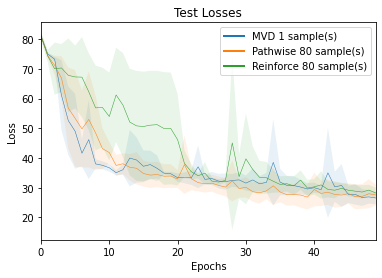

In [2]:
test_losses = defaultdict(list)
for k, v in collect_by(ecg_lstm_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'test_loss')))
test_losses.default_factory = None

step_size = 1
max_len = 0
for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    indices, losses = step_with_end(np.array(losses), step_size)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta, xspace=indices)
    max_len = max(max_len, indices[-1])

legend()
plt.xlim(0, max_len)
#plt.ylim(10, 150)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Test Losses')
plt.savefig(plot_dir / f'vae_lstm_ecg5000_test_losses.pdf')
plt.show()

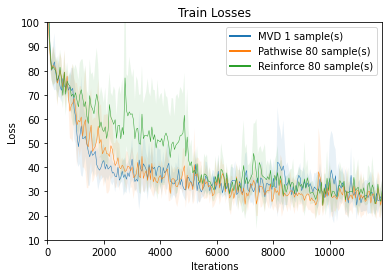

In [3]:
test_losses = defaultdict(list)
for k, v in collect_by(ecg_lstm_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'train_loss')))
test_losses.default_factory = None

step_size = 50
max_len = 0
for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    indices, losses = step_with_end(np.array(losses), step_size)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta, xspace=indices)
    max_len = max(max_len, indices[-1])

legend()
plt.ylim(10, 100)
plt.xlim(0, max_len)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Train Losses')
plt.savefig(plot_dir / f'vae_lstm_ecg5000_train_losses.pdf')
plt.show()

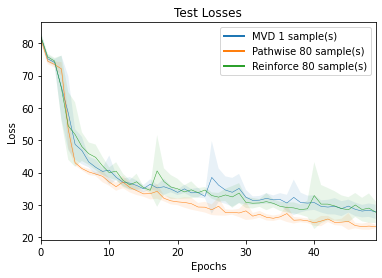

In [4]:
test_losses = defaultdict(list)
for k, v in collect_by(ecg_gru_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'test_loss')))
test_losses.default_factory = None

step_size = 1
max_len = 0
for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    indices, losses = step_with_end(np.array(losses), step_size)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta, xspace=indices)
    max_len = max(max_len, indices[-1])

legend()
plt.xlim(0, max_len)
#plt.ylim(10, 150)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Test Losses')
plt.savefig(plot_dir / f'vae_gru_ecg5000_test_losses.pdf')
plt.show()

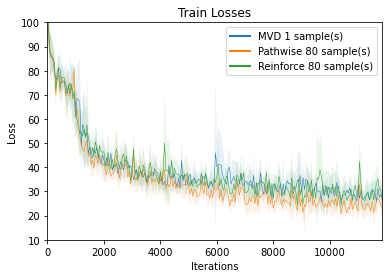

In [5]:
test_losses = defaultdict(list)
for k, v in collect_by(ecg_gru_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'train_loss')))
test_losses.default_factory = None

step_size = 50
max_len = 0
for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    indices, losses = step_with_end(np.array(losses), step_size)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta, xspace=indices)
    max_len = max(max_len, indices[-1])

legend()
plt.ylim(10, 100)
plt.xlim(0, max_len)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Train Losses')
plt.savefig(plot_dir / f'vae_gru_ecg5000_train_losses.pdf')
plt.show()

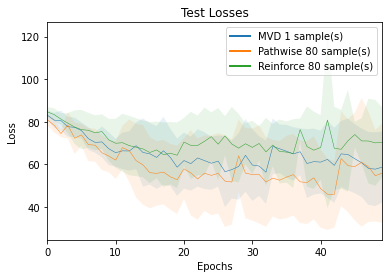

In [6]:
test_losses = defaultdict(list)
for k, v in collect_by(ecg_rnn_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'test_loss')))
test_losses.default_factory = None

step_size = 1
max_len = 0
for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    indices, losses = step_with_end(np.array(losses), step_size)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta, xspace=indices)
    max_len = max(max_len, indices[-1])

legend()
plt.xlim(0, max_len)
#plt.ylim(10, 150)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Test Losses')
plt.savefig(plot_dir / f'vae_rnn_ecg5000_test_losses.pdf')
plt.show()

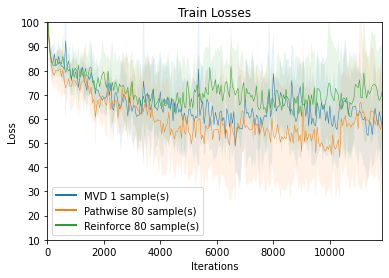

In [7]:
test_losses = defaultdict(list)
for k, v in collect_by(ecg_rnn_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'train_loss')))
test_losses.default_factory = None

step_size = 50
max_len = 0
for run in test_losses.values():
    meta, _ = run[0]
    losses = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, loss in run:
        losses.append(loss.data.numpy().flatten())
    indices, losses = step_with_end(np.array(losses), step_size)
    plot(losses.mean(axis=0), losses.std(axis=0), losses_label, meta, xspace=indices)
    max_len = max(max_len, indices[-1])

legend()
plt.ylim(10, 100)
plt.xlim(0, max_len)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Train Losses')
plt.savefig(plot_dir / f'vae_rnn_ecg5000_train_losses.pdf')
plt.show()

# Variances

In [8]:
test_losses = defaultdict(list)
for k, v in collect_by(ecg_lstm_results, 'mc_estimator', 'sample_size').items():
    for meta in v:
        test_losses[k].append((meta, TensorHolder.load(meta['results_dir'], 'test_loss')))
test_losses.default_factory = None

for run in test_losses.values():
    meta, _ = run[0]
    losses = np.array([l.data.numpy().flatten() for _, l in run])
    stds = losses.std(axis=0)
    print(f"{meta['mc_estimator']} {meta['sample_size']} \t\t {stds.mean():.3f} mean std loss \t {stds.std():.3f} std std loss")

MVD 1 		 4.159 mean std loss 	 3.828 std std loss
Pathwise 1 		 7.391 mean std loss 	 5.219 std std loss
Pathwise 20 		 6.315 mean std loss 	 5.551 std std loss
Pathwise 80 		 5.106 mean std loss 	 3.424 std std loss
Reinforce 10 		 7.404 mean std loss 	 5.796 std std loss
Reinforce 40 		 4.301 mean std loss 	 3.636 std std loss
Reinforce 80 		 8.355 mean std loss 	 7.045 std std loss


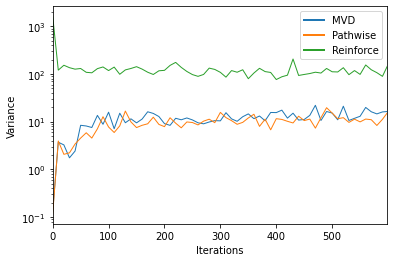

In [9]:
estimator_stds = defaultdict(list)
for k, v in collect_by(ecg_lstm_results, 'mc_estimator').items():
    for meta in v:
        try:
            stds = TensorHolder.load(meta['results_dir'], 'estimator_stds')
            estimator_stds[k].append((meta, stds))
        except FileNotFoundError:
            continue
estimator_stds.default_factory = None

step_size = 10
max_len = 0
for run in estimator_stds.values():
    meta, _ = run[0]
    stds = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, std in run:
        stds.append(std.data.numpy().flatten())
    indices, stds = step_with_end(np.array(stds), step_size)
    vars_ = (stds**2).mean(axis=0)
    plot(vars_, np.zeros_like(vars_), '$mc_estimator$', meta, xspace=indices, linewidth=1)
    max_len = max(max_len, indices[-1])

legend()
plt.yscale('log')
plt.ylabel('Variance')
plt.xlabel('Iterations')
plt.xlim(0, max_len)
plt.savefig(plot_dir / f'ecg5000_lstm_variances.pdf')
plt.show()

No handles with labels found to put in legend.
<ipython-input-10-43f0b2934b31>:29: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.xlim(0, max_len)


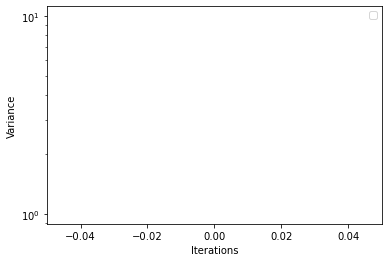

In [10]:
estimator_stds = defaultdict(list)
for k, v in collect_by(ecg_gru_results, 'mc_estimator').items():
    for meta in v:
        try:
            stds = TensorHolder.load(meta['results_dir'], 'estimator_stds')
            estimator_stds[k].append((meta, stds))
        except FileNotFoundError:
            continue
estimator_stds.default_factory = None

step_size = 10
max_len = 0
for run in estimator_stds.values():
    meta, _ = run[0]
    stds = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, std in run:
        stds.append(std.data.numpy().flatten())
    indices, stds = step_with_end(np.array(stds), step_size)
    vars_ = (stds**2).mean(axis=0)
    plot(vars_, np.zeros_like(vars_), '$mc_estimator$', meta, xspace=indices, linewidth=1)
    max_len = max(max_len, indices[-1])

legend()
plt.yscale('log')
plt.ylabel('Variance')
plt.xlabel('Iterations')
plt.xlim(0, max_len)
plt.savefig(plot_dir / f'ecg5000_gru_variances.pdf')
plt.show()

No handles with labels found to put in legend.
<ipython-input-11-55095688fa32>:29: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  plt.xlim(0, max_len)


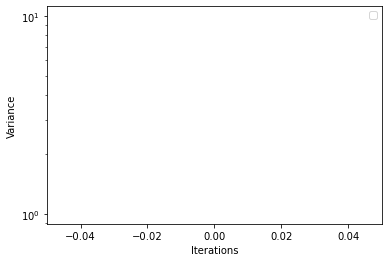

In [11]:
estimator_stds = defaultdict(list)
for k, v in collect_by(ecg_rnn_results, 'mc_estimator').items():
    for meta in v:
        try:
            stds = TensorHolder.load(meta['results_dir'], 'estimator_stds')
            estimator_stds[k].append((meta, stds))
        except FileNotFoundError:
            continue
estimator_stds.default_factory = None

step_size = 10
max_len = 0
for run in estimator_stds.values():
    meta, _ = run[0]
    stds = []
    if meta['sample_size'] < 80 and meta['mc_estimator'] != 'MVD':
        continue
    for meta, std in run:
        stds.append(std.data.numpy().flatten())
    indices, stds = step_with_end(np.array(stds), step_size)
    vars_ = (stds**2).mean(axis=0)
    plot(vars_, np.zeros_like(vars_), '$mc_estimator$', meta, xspace=indices, linewidth=1)
    max_len = max(max_len, indices[-1])

legend()
plt.yscale('log')
plt.ylabel('Variance')
plt.xlabel('Iterations')
plt.xlim(0, max_len)
plt.savefig(plot_dir / f'ecg5000_rnn_variances.pdf')
plt.show()